<a href="https://colab.research.google.com/github/Travis-Code/MacineLearningCapstone/blob/main/capFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import ipywidgets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Mount Google Drive: Saves files directly to/from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Downloads (housing dataset for this project) housingData.csv using its shared link.
! gdown 1HVQJhGaJv3opjIRy9Ip_LiHx74-PiPox

Downloading...
From: https://drive.google.com/uc?id=1HVQJhGaJv3opjIRy9Ip_LiHx74-PiPox
To: /content/housingData.csv
100% 30.0k/30.0k [00:00<00:00, 19.9MB/s]


In [ ]:
#Loads housing dataset for the project.
df = pd.read_csv('/content/housingData.csv',encoding="ISO-8859-1")

**--Clean data--**
We need to convert the datasets datatypes to a numeric format for the ML model to use.

In [ ]:
#price datatype change from int to float
df['price'] = df['price'].astype(float)


In [ ]:
#inspect the data for any potential missing values (there are none)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [ ]:
#display the first 5 rows of the dataset.
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#change datatype object to float for required ML model numerical input
encode = OrdinalEncoder()
df['mainroad'] = encode.fit_transform(df[['mainroad']])
df['guestroom'] = encode.fit_transform(df[['guestroom']])
df['basement'] = encode.fit_transform(df[['basement']])
df['hotwaterheating'] = encode.fit_transform(df[['hotwaterheating']])
df['airconditioning'] = encode.fit_transform(df[['airconditioning']])
df['prefarea'] = encode.fit_transform(df[['prefarea']])
df['furnishingstatus'] = encode.fit_transform(df[['furnishingstatus']])

In [ ]:
#verify datatype change
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000.0,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000.0,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000.0,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000.0,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 55.5 KB


In [ ]:
#average price of a house
average_price = df['price'].mean()
print("The average price of a house based on the data is:", average_price)


The average price of a house based on the data is: 4766729.247706422


**The Dataset has been Cleaned**

**--Visualizations--**

<Figure size 8000x8000 with 0 Axes>

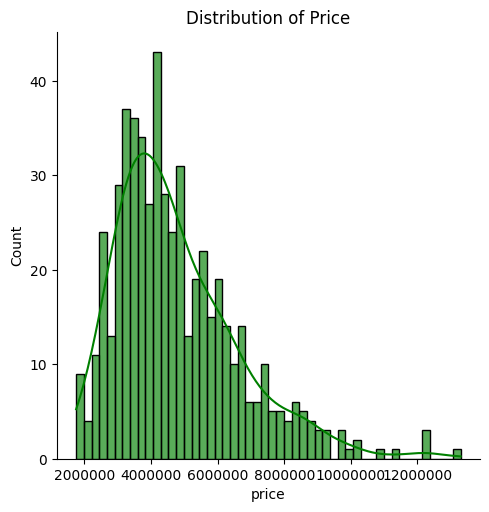

In [ ]:
#Visualization of Distribution of Price
plt.figure(figsize=(80, 80))
sns.displot(data = df, x = "price", color='g', bins=50, kde=True, linewidth = 1, edgecolor = "black", alpha = 0.65)
plt.title("Distribution of Price")
plt.ticklabel_format(style='plain')
plt.show()

Data and its relationships with itself.
Distribution based on Price.

the distribution between 2000000 and 6000000 show that most house's price cost around that amount.

-------------------------------------------------------------------------------

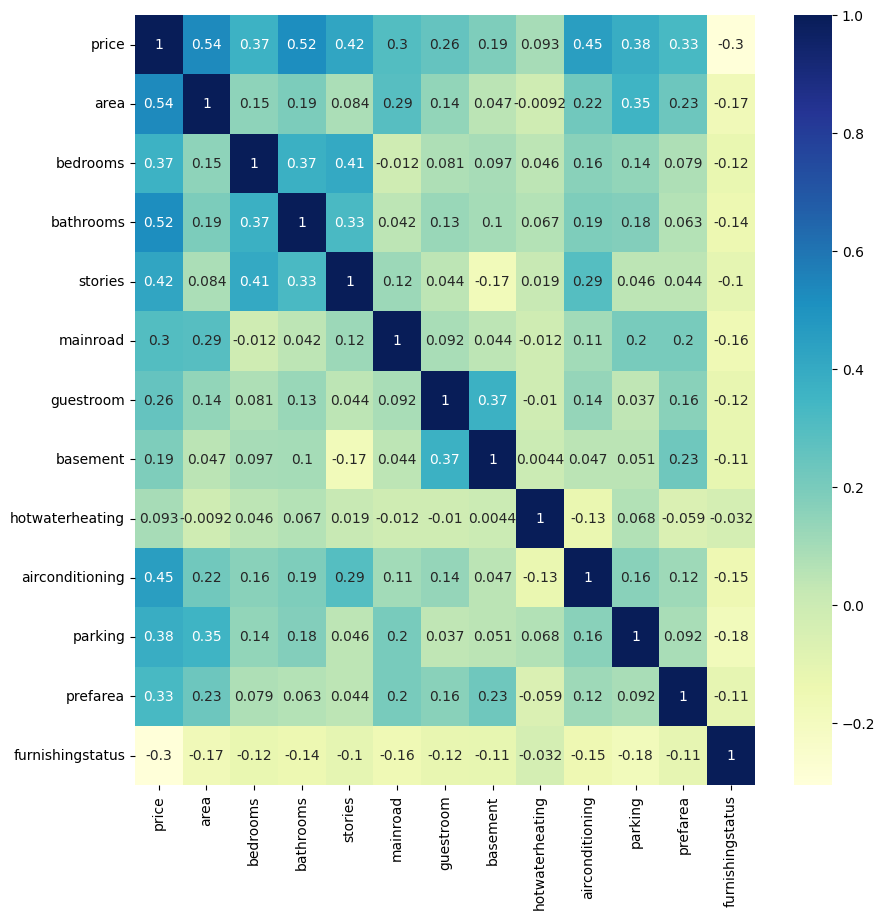

In [ ]:
# plot correlation heatmap
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

Visualization for a Heatmap which shows relationships between all of the data. "annot=True", shows correlation values within the heatmap.

Price has a high corolation with area, bathrooms, air conditioning

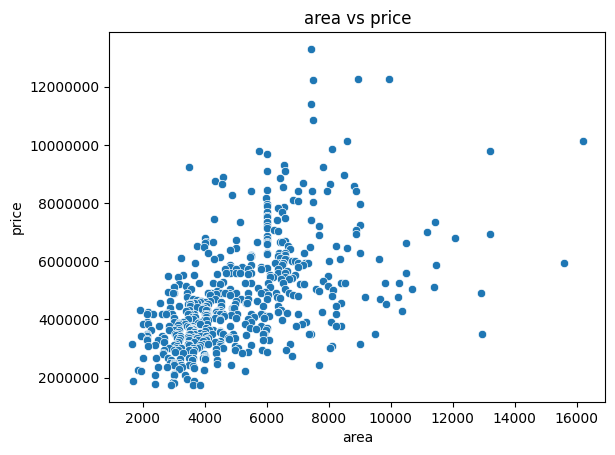

In [ ]:
#scatter plot
sns.scatterplot(x="area", y="price", data=df)
plt.ticklabel_format(style='plain')
plt.xlabel("area")
plt.ylabel("price")
plt.title("area vs price")
plt.show()

**Scatter Plot Visualization** Shows the relationship between the area of the house (area column) and their prices (price column)

# LINEAR REGRESSION MODEL

**PRICE PREDICTION**<br>
Here we aim to establish a relationship between features "x" and the target price "y."
We use 40% of the data for training and 60% for testing.
After the model is trained on 'X_train' and 'y_train', we will predict the 'price for the test set ('X_test')


In [ ]:
#Split the data into Training and Testing sets for our Linear Regression Model.
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
# x are the features we expect that influence'price.'
x = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
# x = df[['area', 'bathrooms']]

In [ ]:
# y is the 'price that we are trying to predict.
y = df["price"]

In [ ]:
# in order to improve accuracy of the ML model, we use 60% of the data as test_size.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# LINEAR REGRESSION TRAINING ON THE DATA.
from sklearn.linear_model import LinearRegression
myLinearRegressionModel = LinearRegression()
myLinearRegressionModel.fit(X_train, y_train)

LinearRegression()

The Linear Regression model is trained on the training data using the 'fit' method.

In [ ]:
#Coefficients from the model represent the change in "y" or "Price."
print("The coefficients of model: \n", myLinearRegressionModel.coef_, "\n")

The coefficients of model: 
 [ 2.20359842e+02  1.18407044e+05  1.02207003e+06  4.38422924e+05
  3.93579662e+05  4.20911466e+05  2.59268032e+05  8.76515648e+05
  9.24434299e+05  2.58413426e+05  8.06319225e+05 -2.69430368e+05] 



Output shows the coefficients for each feature. These values give insight into how much each feature affects the house price. For instance, the coefficient for 'bathrooms' is approximately '1.05 x 10^6, which suggests that for each additional bathroom, the house price increases by around 1.05 million units of currency.

In [ ]:
#The trained linear regression model is used to predict the house prices on the test dataset
#('X_test').
myLinearRegressionModelPrediction = myLinearRegressionModel.predict(X_test)

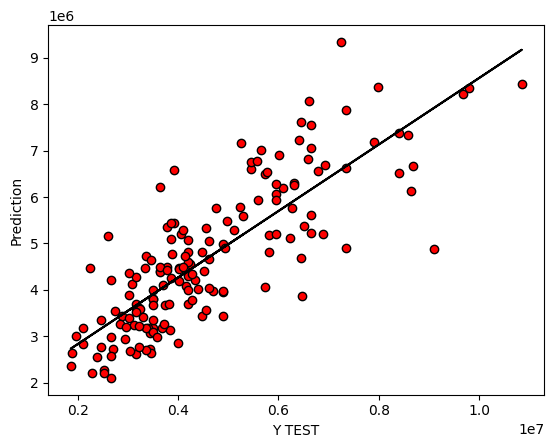

The equation of the line of best fit is: y = 0.716627138005823 * x + 1399569.189262312


In [ ]:
# Scatter plot visualization
plt.scatter(x = y_test, y = myLinearRegressionModelPrediction, color = "r", edgecolor ="black")

# Line of best fit
a, b = np.polyfit(y_test, myLinearRegressionModelPrediction, 1)
plt.plot(y_test, a*y_test + b, color ="black")

# Labels
plt.xlabel("Y TEST")
plt.ylabel("Prediction")

# Show the plot
plt.show()

# Print line equation parameters
print(f"The equation of the line of best fit is: y = {a} * x + {b}")

The scatter plot shows the true values of the house prices ('y_test') against the predicted values. If the models predictions were perfect, all points would lie along a 45-degree line.  Deviations from this line indicate prediction errors.

Line of best fit represents the best linear relationship between the actual and predicted values.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions using the testing set
y_pred = myLinearRegressionModel.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 785770.6312043404
Mean Squared Error (MSE): 1070324522314.0336
Root Mean Squared Error (RMSE): 1034564.8951680284


Evaluation of the trained linear regression model on the test dataset.

Mean Absolute Error (MAE) represents the average absolute difference between the actual and predicted values.  Smaller values indicate better performances.

Mean Squared Error (MSE) represents the average squared difference between the actual and predicted values. (sensitive to outliers snince errors are squared).

Root Mean Sqaured Error (RMSE) is the square root of the MSE. RMSE gives an interpretation of the error in the same unit as the target variable.

In [ ]:
#Interactive GUI for users to predict the price of a house based on various features.
from ipywidgets import widgets, Layout, Button
from IPython.display import display
import numpy as np

output = widgets.Output()

# Function to execute on button click
def on_button_click(b):
    with output:
        try:
            print("Predict price button clicked!")
            area = userArea.value
            bedrooms = userBedrooms.value
            bathrooms = userBathrooms.value
            stories = userStories.value
            mainroad = 1 if userMainroad.value == "Yes" else 0
            guestroom = 1 if userGuestroom.value == "Yes" else 0
            basement = 1 if userBasement.value == "Yes" else 0
            hotwaterheating = 1 if userHotwaterheating.value == "Yes" else 0
            airconditioning = 1 if userAirconditioning.value == "Yes" else 0
            parking = userParking.value
            prefarea = 1 if userPrefarea.value == "Yes" else 0
            furnishingstatus = 0 if userFurnishingstatus.value == "Furnished" else 1 if userFurnishingstatus.value == "Semi-furnished" else 2

            predicted_price = myLinearRegressionModel.predict([[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]])

            print(f"The predicted PRICE of the house given the features provided is: {predicted_price[0]}")
            print(f"the Predicted price could be off by as much as the (RMSE):  {rmse}")


        except Exception as e:
            print(f"An error occurred: {e}")


# Create widgets
userArea = widgets.IntSlider(min = 100, max = 10000, description="Area:")
userBedrooms = widgets.IntSlider(min = 1, max = 10, description="Bedrooms:")
userBathrooms = widgets.IntSlider(min = 1, max = 10, description="Bathrooms:")
userStories = widgets.IntSlider(min = 1, max = 4, description="Stories:")
userMainroad = widgets.Dropdown(options=["Yes", "No"], description="Main road:")
userGuestroom = widgets.Dropdown(options=["Yes", "No"], description="Guest room:")
userBasement = widgets.Dropdown(options=["Yes", "No"], description="Basement:")
userHotwaterheating = widgets.Dropdown(options=["Yes", "No"], description="Hot water heating:")
userAirconditioning = widgets.Dropdown(options=["Yes", "No"], description="Air conditioning:")
userParking = widgets.IntSlider(min = 0, max = 10, description="Parking:")
userPrefarea = widgets.Dropdown(options=["Yes", "No"], description="Preferred area:")
userFurnishingstatus = widgets.Dropdown(options=["Furnished", "Semi-furnished", "Unfurnished"], description="Furnishing Status:")

# Create a button to trigger prediction
predict_button = Button(description="Predict Price")
predict_button.on_click(on_button_click)

# Display widgets and button
print("Please set the values for the following house features to get a price prediction.")
display(userArea, userBedrooms, userBathrooms, userStories, userMainroad, userGuestroom, userBasement, userHotwaterheating, userAirconditioning, userParking, userPrefarea, userFurnishingstatus, predict_button, output)



Please set the values for the following house features to get a price prediction.


IntSlider(value=100, description='Area:', max=10000, min=100)

IntSlider(value=1, description='Bedrooms:', max=10, min=1)

IntSlider(value=1, description='Bathrooms:', max=10, min=1)

IntSlider(value=1, description='Stories:', max=4, min=1)

Dropdown(description='Main road:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Guest room:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Basement:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Hot water heating:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Air conditioning:', options=('Yes', 'No'), value='Yes')

IntSlider(value=0, description='Parking:', max=10)

Dropdown(description='Preferred area:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Furnishing Status:', options=('Furnished', 'Semi-furnished', 'Unfurnished'), value='Furn…

Button(description='Predict Price', style=ButtonStyle())

Output()

Adjust the widgets to their desired values and click "Predict Price" button

You can expiriment with different house features to see thier impact on the predicted house price.  